In [41]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import json 

#plot confusion matrix
from sklearn.metrics import confusion_matrix




# Load the Dataset

In [42]:
df = pandas = pd.read_csv('../German_Credit_data/Data/german.data', sep=' ')
df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
995,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
996,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
997,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Da die Attributsnamen kodiert sind werden diese zu erst mithilfe der zugehörigen Dokumentation ersetzt. (Siehe Categorical.json)


In [43]:
file_path = "../German_Credit_data/Data/german.data"

names = ['Status Checking', 'Duration in Month', 'Credit History', 'Purpose', 'Credit Amount', 
         'Savings Account', 'Employement since', 'Installmentrate %', 'StatusSex', 'Otherdebtos', 
         'PresentResidence', 'Property', 'Age in years', 'Otherinstallment Plans', 'Housing', 
         'Number existing Credits', 'Job', 'Number people liable', 'Telephone', 'Foreign Worker', 'Target']
german_data = pd.read_csv(file_path,names=names,delim_whitespace=True, header=None)
catgories = open('../German_Credit_data/Data/categorical.json')
json_data = json.load(catgories)
json_data
for h in names:
    if h in json_data:
        german_data[h] = german_data[h].map(json_data[h])

In [44]:
german_data.head(5)

,Status Checking,Duration in Month,Credit History,Purpose,Credit Amount,Savings Account,Employement since,Installmentrate %,StatusSex,Otherdebtos,...,Property,Age in years,Otherinstallment Plans,Housing,Number existing Credits,Job,Number people liable,Telephone,Foreign Worker,Target
0,less than 0 DM,6,critical account / other credits existing (not...,radio/television,1169,unknown / no savings account,bigger than or equal 7 years,4,male : single,None,...,real estate,67,None,own,2,skilled employee /official,1,"yes, registered under the customers name",yes,1
1,0 less than or equal and less than 200 DM,48,existing credits paind back duly till now,radio/television,5951,less than 100DM,1 less than or equal and less than 4 years,2,female : divorced/separated/married,None,...,real estate,22,None,own,1,skilled employee /official,1,None,yes,2
2,no checking account,12,critical account / other credits existing (not...,education,2096,less than 100DM,4 less than and equal and less than 7 years,2,male : single,None,...,real estate,49,None,own,1,unskilled-resident,2,None,yes,1
3,less than 0 DM,42,existing credits paind back duly till now,furniture/equipment,7882,less than 100DM,4 less than and equal and less than 7 years,2,male : single,guarantor,...,if not real estate : building society savings ...,45,None,for free,1,skilled employee /official,2,None,yes,1
4,less than 0 DM,24,delay in paying off in the past,car (new),4870,less than 100DM,1 less than or equal and less than 4 years,3,male : single,None,...,unknown/no property,53,None,for free,2,skilled employee /official,2,None,yes,2


In [45]:
#import dataframe_image as dfi
#german_data.head(5).dfi.export('df.png')

In [46]:
# check for missing values
german_data.isnull().sum()


Status Checking            0
Duration in Month          0
Credit History             0
Purpose                    0
Credit Amount              0
Savings Account            0
Employement since          0
Installmentrate %          0
StatusSex                  0
Otherdebtos                0
PresentResidence           0
Property                   0
Age in years               0
Otherinstallment Plans     0
Housing                    0
Number existing Credits    0
Job                        0
Number people liable       0
Telephone                  0
Foreign Worker             0
Target                     0
dtype: int64

In [47]:
#df_styled = german_data.describe().style.background_gradient()
# describe the data
#dfi.export(df_styled, 'df_stats.png')


# Prüfung der Daten auf Plausibilität und Allgemeine Datenanalyse

<AxesSubplot:>

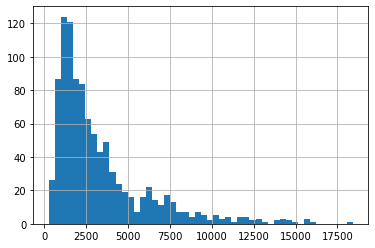

In [48]:
#check credit amount for outliers
german_data['Credit Amount'].hist(bins=50)




<AxesSubplot:ylabel='Frequency'>

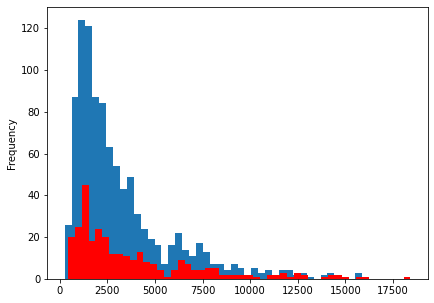

In [49]:
plt.subplot(1, 2, 1)
german_data['Credit Amount'].plot(kind='hist', logx=False, bins=50)
# plot histogram credit amout where target is 2
german_data.loc[german_data['Target'] == 2, 'Credit Amount'].plot(kind='hist', logx=False, bins=50, color='red', figsize=(15, 5))


<AxesSubplot:ylabel='Target'>

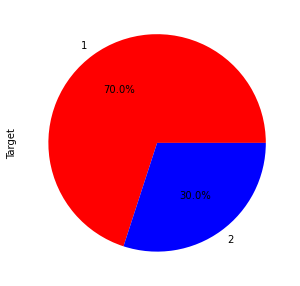

In [50]:
# plot target variable as pie chart with target 1 and target 2 as labels colored red and blue

german_data['Target'].value_counts().plot(kind='pie', colors=['red', 'blue'], autopct='%1.1f%%', figsize=(15, 5))

# Zielvariable ist Ungleichverteilt

# Untersuchung auf Outlier

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='Target'>

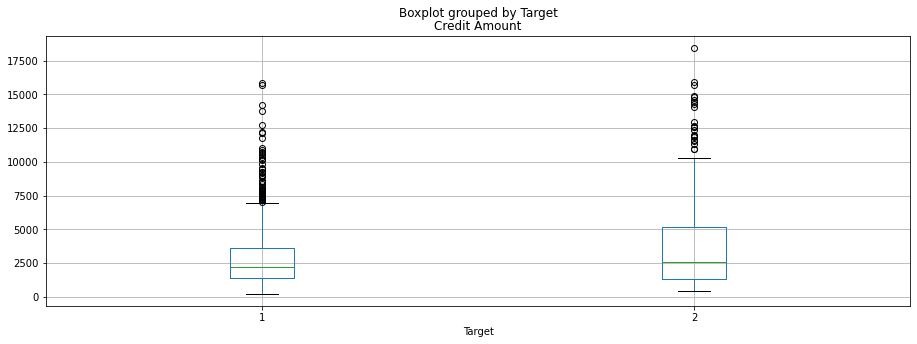

In [51]:
#box plot credit amount outliers
german_data.boxplot(column='Credit Amount', by='Target', figsize=(15, 5))

<AxesSubplot:xlabel='Credit Amount', ylabel='Target'>

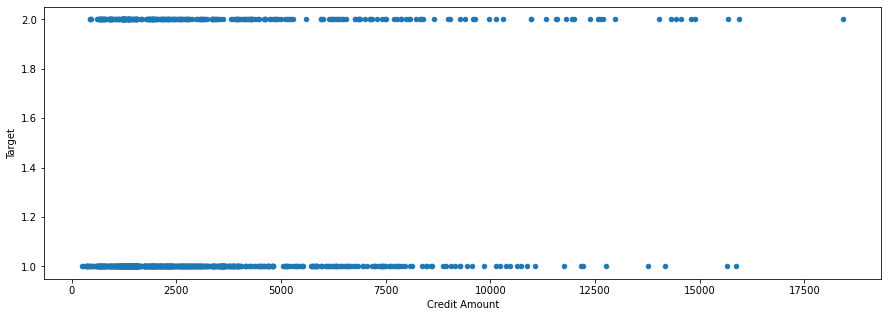

In [52]:
# scatter plot credit amount
german_data.plot(kind='scatter', x='Credit Amount', y='Target', figsize=(15, 5))

<AxesSubplot:>

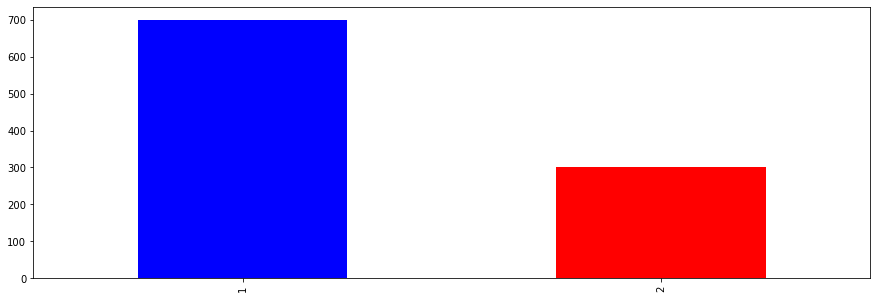

In [53]:
# plot distribution of target variable with color 2 as red and color 1 as blue

german_data['Target'].value_counts().plot(kind='bar', figsize=(15, 5), color=['blue', 'red'])

# Analysen

## Outlier Analysis

In [ ]:
# calculate ZScore for credit amount --> for outlier detection
german_data['ZScore'] = (german_data['Credit Amount'] - german_data['Credit Amount'].mean()) / german_data['Credit Amount'].std()
#plot zscore for credit amount
german_data['ZScore'].plot(kind='hist', bins=50, figsize=(15, 5))

In [ ]:
# calculate IQR for credit amount
def outlier_detection(df):
    Q1 = np.percentile(german_data['Credit Amount'], 25,
                    interpolation = 'midpoint')
    
    Q3 = np.percentile(german_data['Credit Amount'], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1

    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    upper = german_data['Credit Amount'] >= (Q3+1.5*IQR)
    
    print("Upper bound:",upper)
    print(np.where(upper))
    
    # Below Lower bound
    lower = german_data['Credit Amount'] <= (Q1-1.5*IQR)
    print("Lower bound:", lower)
    print(np.where(lower))
outlier_detection(german_data)

In [ ]:
# function to determine outlier values
def outlier_iqr(df):
    quartile_1, quartile_3 = np.percentile(df, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((df > upper_bound) | (df < lower_bound))
# calculate the outlier values
outlier_iqr(german_data['Credit Amount'])

In [ ]:
# transform target value 2 to 1 and 1 to 0 to be binary
# 0 = good credit ; 1 = bad credit
german_data['Target'] = german_data['Target'].map({2:1, 1:0})

# map value 0 to string "good" credit and 1 to "bad" credit
#german_data['Target'] = german_data['Target'].map({0:'good', 1:'bad'})



In [ ]:
german_data['Target'].value_counts()

In [ ]:
# function to calculate correlation between target and feautures 
# only plot the 5 most correlated features with target variable

def correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(36,36), dpi = 480)
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

    correlations = df.corr()['Target'].sort_values()

    # Display correlations
    print(' Positive Correlations:\n', correlations)
    print(' Negative Correlations:\n', correlations)

correlation_matrix(german_data)

In [ ]:
#iterate through feautures and get datatype and check if they are categorical or numerical and store them into list for one hot encoding
categorical_features = []
numerical_features = []
for i in german_data.columns:
    print(i, german_data[i].dtype)
    if german_data[i].dtype == 'object':
        print(i, german_data[i].dtype)
        categorical_features.append(i)
    else:
        print(i, german_data[i].dtype)
        numerical_features.append(i)


print(categorical_features, "Numerical:" ,numerical_features)
    


In [ ]:
german_data

In [ ]:
# one hot encode categorical features
german_data = pd.get_dummies(german_data, columns=categorical_features)



In [ ]:
# still 1000 rows but 63 columns after one hot encoding
german_data.shape

In [ ]:
#drop zscore
german_data = german_data.drop(['ZScore'], axis=1)


# Basic Modelling with Logistic Regression as Baseline, xGboost and a neuronal Network

In [ ]:
# create dictionary with algo names and score metrics for later analysis

Non_opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": []}

In [ ]:
# use logistic regression to predict target variable
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, fbeta_score

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(german_data.drop('Target', axis=1), german_data['Target'], test_size=0.15, random_state=42)

# create logistic regression model
'''
solver to liblinear --> better score; standard lbfgs
'''
logreg = LogisticRegression(max_iter=100, intercept_scaling=100, solver = 'liblinear')
# fit the model
logreg.fit(X_train, y_train)
# predict the target variable
y_pred = logreg.predict(X_test)

# print accuracy score and recall score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))

# add algo name and recall score to dictionary
Non_opt_results["Algo_name"].append("Logistic Regression")
Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))





In [ ]:
#plot roc curve
from sklearn.metrics import roc_curve, auc
#plot roc curve
def plot_roc_curve(y_test, y_pred,label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+label)
    plt.legend(loc="lower right")
    plt.show()
# call the function roc curve
plot_roc_curve(y_test, y_pred,"Logistic Regression")

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(label):
    #plot confusion matrix with labels
    plt.figure()
    sns.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.title('Confusion matrix:'+ label)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# plot confusion matrix
plot_confusion_matrix("Logistic Regression")


In [ ]:
# use random forest to predict target variable
from sklearn.ensemble import RandomForestClassifier
# fit the model
rf = RandomForestClassifier( random_state=42)
rf.fit(X_train, y_train)
# predict the target variable
y_pred = rf.predict(X_test)
# print accuracy score and recall score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))

Non_opt_results["Algo_name"].append("Random Forest")
Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))



In [ ]:
plot_roc_curve(y_test, y_pred,"Random Forest")

In [ ]:
# use neuro network to predict target variable
# als baseline werden die Standardparameter verwendet
from sklearn.neural_network import MLPClassifier
# fit the model
nn = MLPClassifier(hidden_layer_sizes=(23,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
# predict the target variable
y_pred = nn.predict(X_test)
# print accuracy score and recall score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))

Non_opt_results["Algo_name"].append("Neural Network")
Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))


In [ ]:
plot_roc_curve(y_test, y_pred,"Neural Network")

In [ ]:
plot_confusion_matrix("Neural Network")


In [ ]:
# use xgboost to predict target variable
from xgboost import XGBClassifier
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

# fit the model
xgb = XGBClassifier(n_estimators=1000, max_depth=1000, random_state=42)


xgb.fit(X_train, y_train)
# predict the target variable
y_pred = xgb.predict(X_test)
# print accuracy score and recall score
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))

Non_opt_results["Algo_name"].append("xGboost")
Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))



In [ ]:
plot_roc_curve(y_test, y_pred,"xGboost")

In [ ]:
plot_confusion_matrix("xGboost")


# Ergebnisse nicht Optimierte Modelle


In [ ]:
Non_opt_results

# Modells Optimized with Hyperparametertuning
## Logistic Regression

In [ ]:
# dictionary for hypertuned modells
Opt_results = {"Algo_name": [], "Recall": [],"Accuracy": [], "F2": []}

In [ ]:
#hyperparameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV
#tune hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],'intercept_scaling': [100, 500, 1000, 5000, 10000]}
# create grid search object with cross validation
grid_search = GridSearchCV(logreg, parameters, cv=5, scoring='recall')
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
#tune hyperparameters for random forest
parameters = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
# create grid search object with cross validation
grid_search = GridSearchCV(rf, parameters, cv=5, scoring='recall')
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



In [ ]:
# Non_opt_results to excel file
Non_opt_results = pd.DataFrame(Non_opt_results)
Non_opt_results

# Hyperopt Hyperparametertuning

In [ ]:
# import hyperopt for hyperparameter tuning
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# define the objective function
def objective(params):
    # create a logistic regression object
    logreg = LogisticRegression(C=params['C'], penalty=params['penalty'], intercept_scaling=params['intercept_scaling'])
    # fit the model
    logreg.fit(X_train, y_train)
    # predict the target variable
    y_pred = logreg.predict(X_test)
    # return the accuracy score
    return accuracy_score(y_test, y_pred)
# define the hyperparameter space
space = {'C': hp.uniform('C', 0.0001, 1000), 'penalty': hp.choice('penalty', ['l2']), 'intercept_scaling': hp.uniform('intercept_scaling', 0.0001, 10000)}
# create a Trials object
trials = Trials()
# run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
# print the best hyperparameters
print("Best hyperparameters:", best)
# print the best score
print("Best score:", trials.best_trial['result']['loss'])



# Ideas
- check label encoding vs one hor encoding
- hyperparamter tuning
- use shape for neuronal network
- feauture importance

- Feauture engineering?
- oversampling?


Test